In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Plot imports
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# ML modeling imports
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse


In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### **importing the test and train datasets**

In [3]:
TRAIN = pd.read_csv('TRAIN.csv')
TEST = pd.read_csv('TEST.csv')

## Data Preprocessing

In [4]:
TRAIN.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# MSSubClass, MoSold and YrSold are actually a categorical variables, so converting them to categorical variables (object type) and dropping ID

TRAIN['MSSubClass'] = TRAIN['MSSubClass'].astype('object')
TRAIN['MoSold'] = TRAIN['MoSold'].astype('object')
TRAIN['YrSold'] = TRAIN['YrSold'].astype('object')


TEST['MSSubClass'] = TEST['MSSubClass'].astype('object')
TEST['MoSold'] = TEST['MoSold'].astype('object')
TEST['YrSold'] = TEST['YrSold'].astype('object')


In [6]:
# Separate categorical from numerical(continuous) variables and store them in separate lists

cat_cols_TRAIN = []
cont_cols_TRAIN = []

for i in TRAIN.columns:
    if TRAIN[i].dtypes == 'object':
        cat_cols_TRAIN.append(i)
    else:
        cont_cols_TRAIN.append(i)

In [7]:
cat_cols_TEST = []
cont_cols_TEST = []

for i in TEST.columns:
    if TEST[i].dtypes == 'object':
        cat_cols_TEST.append(i)
    else:
        cont_cols_TEST.append(i)

## **Exploratory Data Analysis**

### checking the target variable

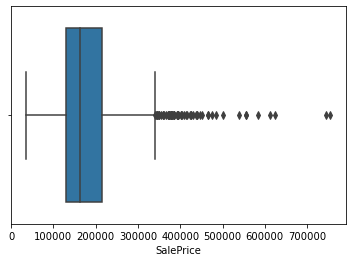

In [8]:
sns.boxplot(TRAIN['SalePrice'])
plt.show()

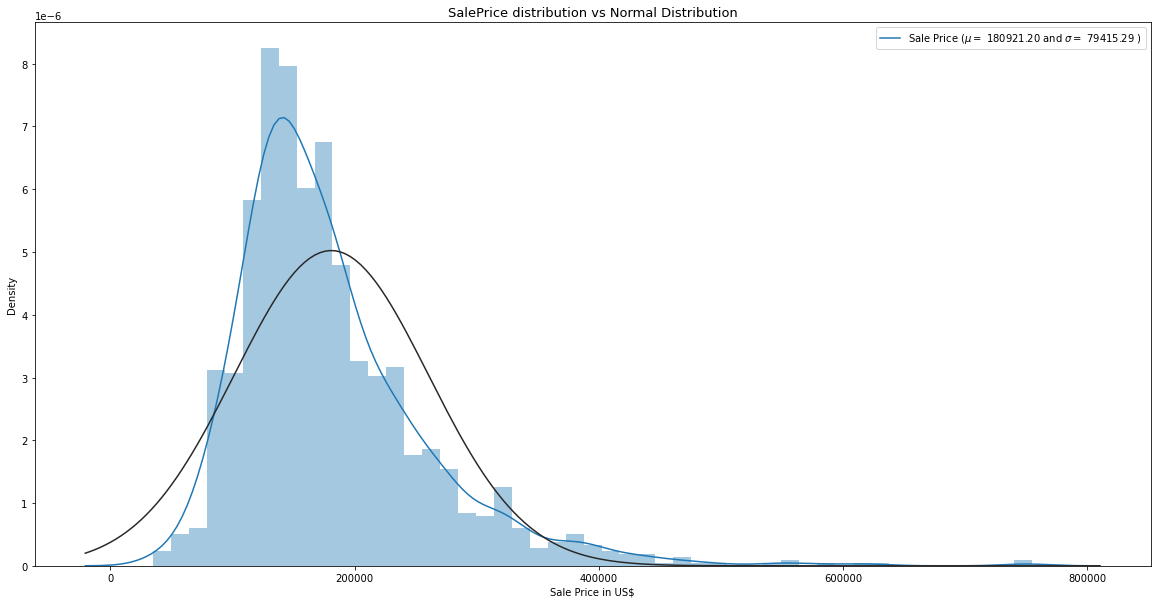

In [9]:
from scipy.stats import norm
(avge, std_dev) = norm.fit(TRAIN['SalePrice'])
plt.figure(figsize = (20,10))
sns.distplot(a=TRAIN['SalePrice'],hist=True,kde=True,fit=norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

As we can see, the SalesPrice does not have a normal distribution. It is skewed to the left. Let's convert this to a natural log and then see the distribution.

In [10]:
TRAIN['SalePrice'] = np.log(TRAIN['SalePrice'])
TRAIN['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

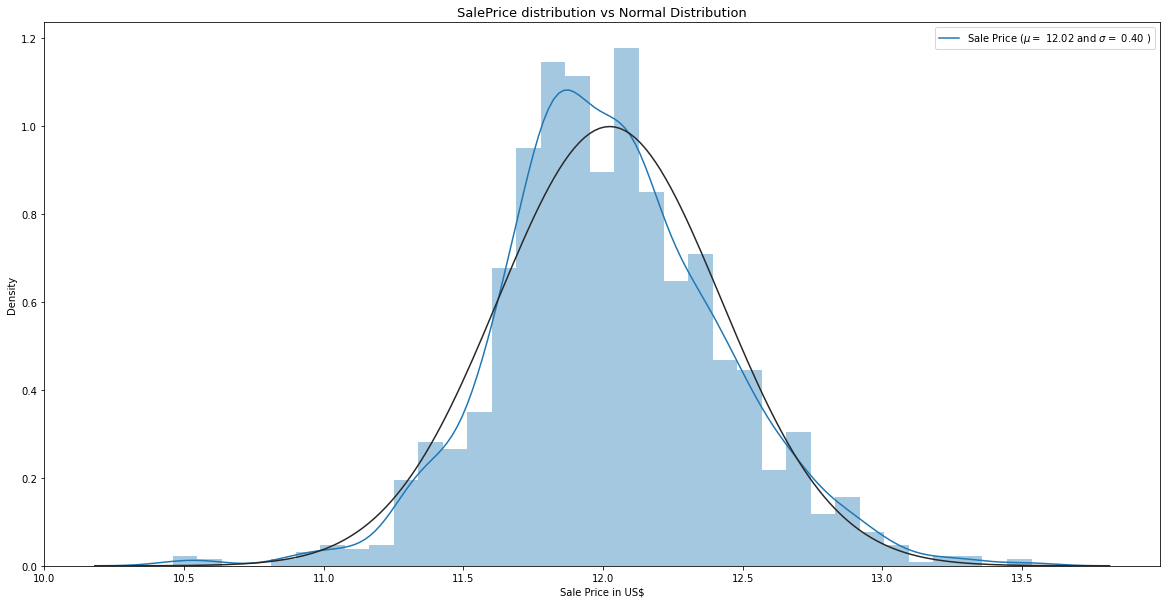

In [11]:
(avge, std_dev) = norm.fit(TRAIN['SalePrice'])
plt.figure(figsize = (20,10))
sns.distplot(a=TRAIN['SalePrice'],hist=True,kde=True,fit=norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

Check for ouliers in the target variable

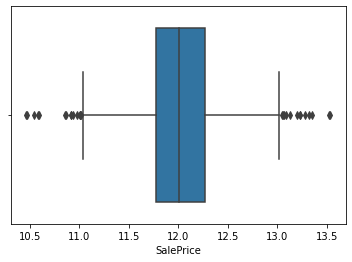

In [12]:
sns.boxplot(TRAIN['SalePrice'], orient='v')
plt.show()

In [13]:
def outliers(variable):
  sorted(TRAIN[variable])
  Q1,Q3 = np.percentile(TRAIN[variable],[25,75])
  IQR = Q3-Q1
  lr = Q1 - (1.5*IQR)
  ur = Q3 + (1.5*IQR)
  return ur,lr

ur,lr = outliers('SalePrice')

TRAIN = TRAIN.drop(TRAIN[(TRAIN['SalePrice']<lr ) | (TRAIN['SalePrice']>ur)].index)

In [14]:
TRAIN.shape

(1432, 81)

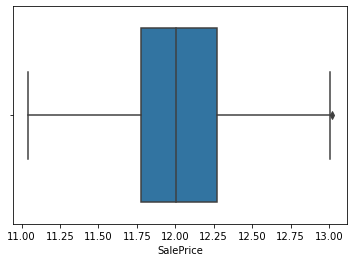

In [15]:
sns.boxplot(TRAIN['SalePrice'], orient='v')
plt.show()

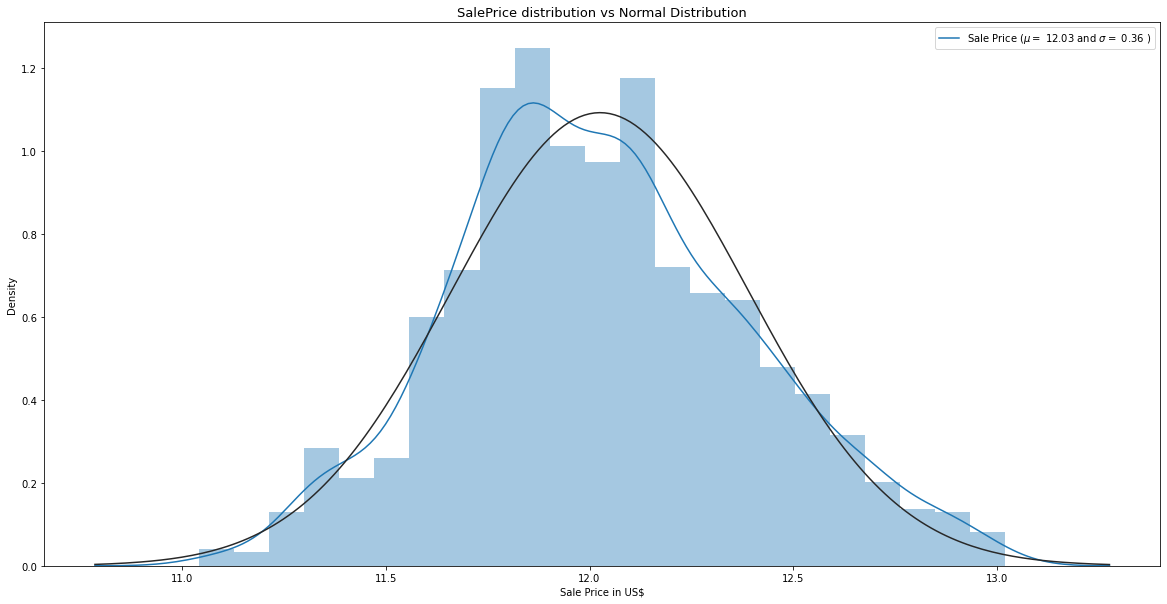

In [16]:
(avge, std_dev) = norm.fit(TRAIN['SalePrice'])
plt.figure(figsize = (20,10))
sns.distplot(a=TRAIN['SalePrice'],hist=True,kde=True,fit=norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel('Sale Price in US$')
plt.legend(['Sale Price ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(avge, std_dev)],
            loc='best')
plt.show()

Drawing histograms to understand the data distribution in the continuous variables

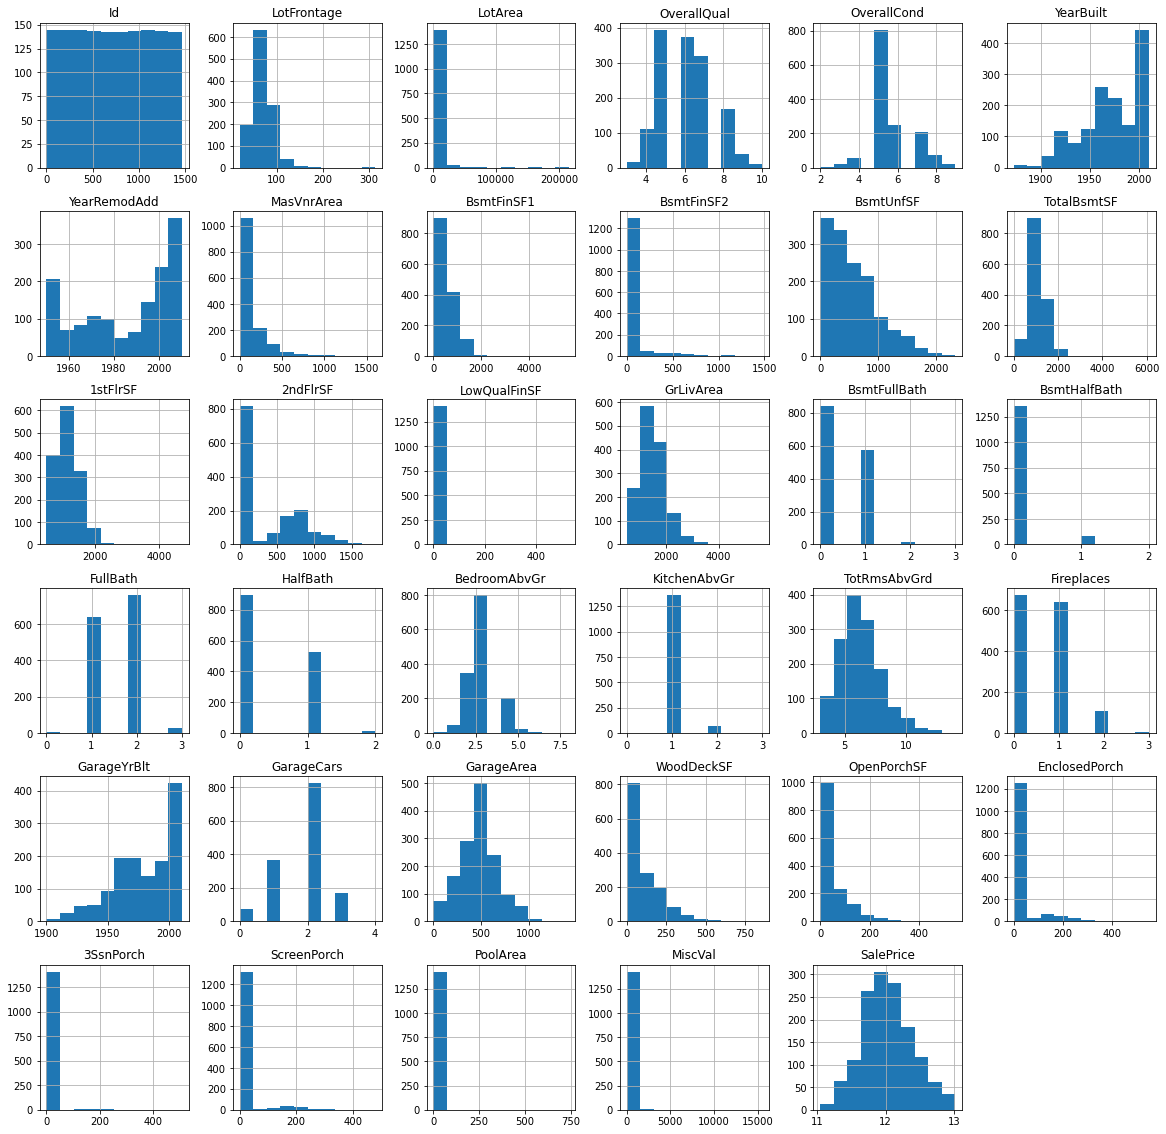

In [17]:
TRAIN[cont_cols_TRAIN].hist(figsize=(20,20))
plt.show()

In the above we can notice the following:

for most continuous variables, the scales vary widely, hence we will need to standardise the data.
Variables such as YearBuilt, GarageYrBlt are left skewed, but still more and more houses are build in the recent years and more and more garages are built in the later years. Hence we will not check or treat any ourliers for these variables.
Similarly, variables like EnclosedPorch, OpenPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal have overwhelming number of values close to 0. This means they actually may be significant for determining the Sale Price.
However before dropping these variables we will look at their value counts as well as correlation martix.
We have the following variables for which the values are heavily right skewed.

'LoTArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

Lets check the descriptive values for these variables

In [18]:
list1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtHalfBath','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
desc1 = TRAIN[list1].describe().transpose()
desc1['coeff_of_var'] = desc1['std']/desc1['mean']

In [19]:
desc1

,count,mean,std,min,25%,50%,75%,max,coeff_of_var
LotArea,1432.0,10464.975559,9967.463434,1300.0,7553.50,9475.0,11532.75,215245.0,0.952459
MasVnrArea,1425.0,100.698246,172.683415,0.0,0.00,0.0,164.00,1600.0,1.714860
BsmtFinSF1,1432.0,440.785615,447.481786,0.0,0.00,384.5,709.00,5644.0,1.015191
BsmtFinSF2,1432.0,47.083101,162.242025,0.0,0.00,0.0,0.00,1474.0,3.445865
BsmtUnfSF,1432.0,565.339385,439.766458,0.0,219.75,474.0,808.00,2336.0,0.777880
LowQualFinSF,1432.0,5.559358,46.751966,0.0,0.00,0.0,0.00,528.0,8.409599
BsmtHalfBath,1432.0,0.057961,0.239656,0.0,0.00,0.0,0.00,2.0,4.134782
WoodDeckSF,1432.0,94.441341,124.954642,0.0,0.00,0.0,168.00,857.0,1.323093
OpenPorchSF,1432.0,46.161313,64.968023,0.0,0.00,24.5,68.00,547.0,1.407413
EnclosedPorch,1432.0,22.046089,61.405862,0.0,0.00,0.0,0.00,552.0,2.785340


Here we can see that there are several variables where the coefficient of Variation (std/mean) is extremely high accompanied by very few non zero values. These data in these variables have very high variability.

While we will typically include data with high variability, in this case we will ignore those variables where the upper quantile is also 0 and the coeficient of variation is above 3. Its very much like having the missing values

In [20]:
desc1[desc1['coeff_of_var']>3].T.columns

Index(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [21]:
dropped_columns = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal']

TRAIN.drop(dropped_columns,axis=1, inplace=True)
TEST.drop(dropped_columns,axis=1, inplace=True)

In [22]:
cat_cols_TEST

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [23]:
cat_cols_TRAIN

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

Checking the correlation between various variables

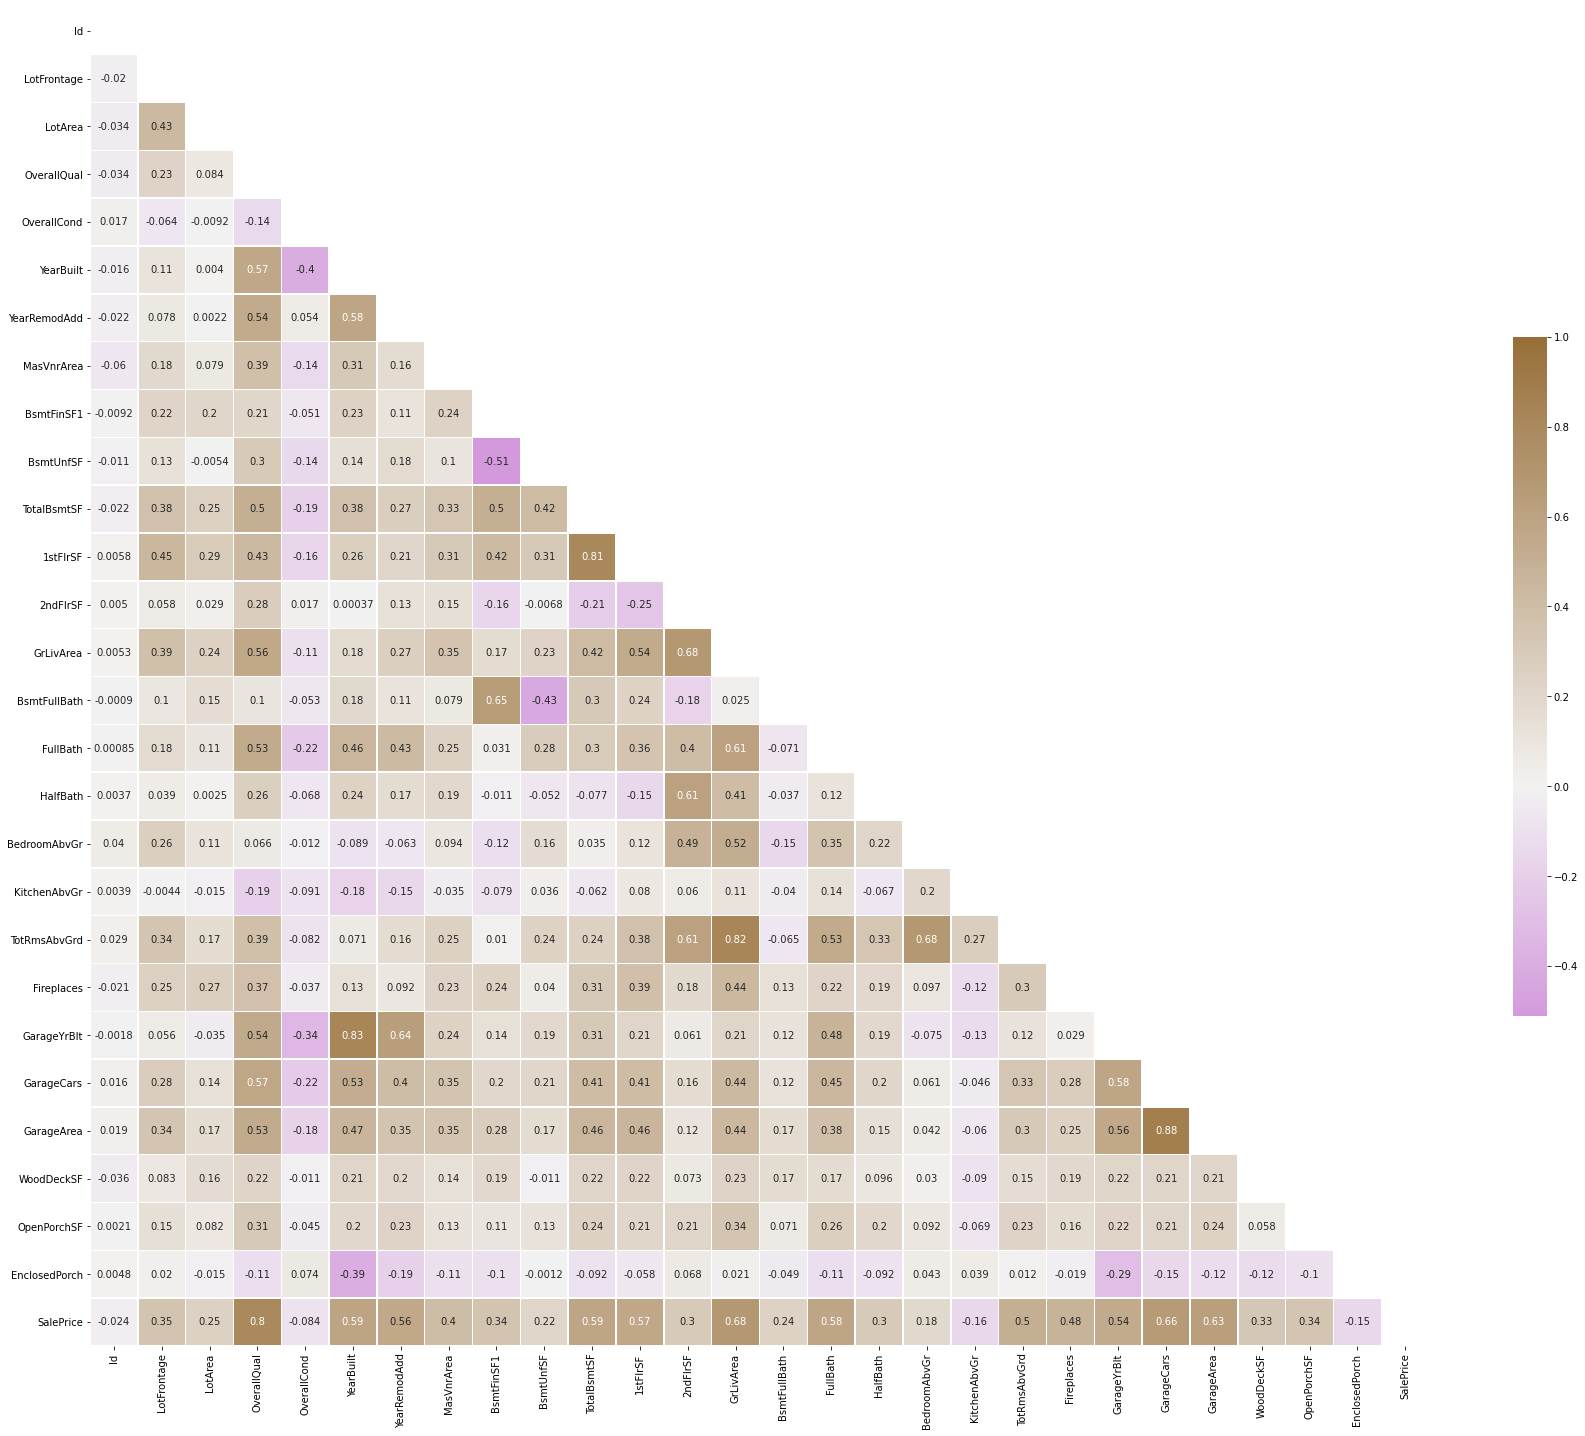

In [24]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(30, 25))
corr_matrix = TRAIN.corr('pearson')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(300, 50, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [25]:
cat_cols_TRAIN = []
cont_cols_TRAIN = []

for i in TRAIN.columns:
    if TRAIN[i].dtypes == 'object':
        cat_cols_TRAIN.append(i)
    else:
        cont_cols_TRAIN.append(i)

In [26]:
cat_cols_TEST = []
cont_cols_TEST = []

for i in TEST.columns:
    if TEST[i].dtypes == 'object':
        cat_cols_TEST.append(i)
    else:
        cont_cols_TEST.append(i)

**Let's check and impute missing values in continuous variables**

In [27]:
def get_missing_stats(df, col_list, threshold=0):
    total = len(df)
    for col in col_list:
        null = df[col].isnull().sum()
        if null > 0 and null/total >= threshold:
            print(col)
            if df[col].dtypes == 'object':
                print(df[col].value_counts())
            print(f'Missing values: {null} of {total}')
            print(f'Percent missing values: {round((null*100)/total, 2)}%\n')

In [28]:
get_missing_stats(TRAIN, cont_cols_TRAIN)

LotFrontage
Missing values: 257 of 1432
Percent missing values: 17.95%

MasVnrArea
Missing values: 7 of 1432
Percent missing values: 0.49%

GarageYrBlt
Missing values: 72 of 1432
Percent missing values: 5.03%



In [29]:
get_missing_stats(TEST, cont_cols_TEST)

LotFrontage
Missing values: 227 of 1459
Percent missing values: 15.56%

MasVnrArea
Missing values: 15 of 1459
Percent missing values: 1.03%

BsmtFinSF1
Missing values: 1 of 1459
Percent missing values: 0.07%

BsmtUnfSF
Missing values: 1 of 1459
Percent missing values: 0.07%

TotalBsmtSF
Missing values: 1 of 1459
Percent missing values: 0.07%

BsmtFullBath
Missing values: 2 of 1459
Percent missing values: 0.14%

GarageYrBlt
Missing values: 78 of 1459
Percent missing values: 5.35%

GarageCars
Missing values: 1 of 1459
Percent missing values: 0.07%

GarageArea
Missing values: 1 of 1459
Percent missing values: 0.07%



Since we do not have an extreme case of missing values, we can simply replace them by the median (as the data seems to be highly variable and median is a robust metric) of training set in both the training and test set.

In [30]:
imputer = SimpleImputer(strategy='median')
TRAIN[cont_cols_TRAIN[:-1]] = imputer.fit_transform(TRAIN[cont_cols_TRAIN[:-1]])
TEST[cont_cols_TEST] = imputer.transform(TEST[cont_cols_TEST])

In [31]:
get_missing_stats(TRAIN, cont_cols_TRAIN)

In [32]:
get_missing_stats(TEST, cont_cols_TEST)

So, the missing values for numerical columns have disappeared from the numerical columns. Now, lets hit the categorical columns.

Let's check and impute missing values in categorical columns

In [33]:
get_missing_stats(TRAIN, cat_cols_TRAIN)

Alley
Grvl    48
Pave    40
Name: Alley, dtype: int64
Missing values: 1344 of 1432
Percent missing values: 93.85%

MasVnrType
None       847
BrkFace    441
Stone      122
BrkCmn      15
Name: MasVnrType, dtype: int64
Missing values: 7 of 1432
Percent missing values: 0.49%

BsmtQual
TA    636
Gd    617
Ex    110
Fa     34
Name: BsmtQual, dtype: int64
Missing values: 35 of 1432
Percent missing values: 2.44%

BsmtCond
TA    1292
Gd      64
Fa      40
Po       1
Name: BsmtCond, dtype: int64
Missing values: 35 of 1432
Percent missing values: 2.44%

BsmtExposure
No    941
Av    217
Gd    125
Mn    113
Name: BsmtExposure, dtype: int64
Missing values: 36 of 1432
Percent missing values: 2.51%

BsmtFinType1
Unf    419
GLQ    409
ALQ    219
BLQ    146
Rec    130
LwQ     74
Name: BsmtFinType1, dtype: int64
Missing values: 35 of 1432
Percent missing values: 2.44%

BsmtFinType2
Unf    1231
Rec      54
LwQ      46
BLQ      33
ALQ      18
GLQ      14
Name: BsmtFinType2, dtype: int64
Missing values: 36

In [34]:
get_missing_stats(TEST, cat_cols_TEST)

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
Missing values: 4 of 1459
Percent missing values: 0.27%

Alley
Grvl    70
Pave    37
Name: Alley, dtype: int64
Missing values: 1352 of 1459
Percent missing values: 92.67%

Utilities
AllPub    1457
Name: Utilities, dtype: int64
Missing values: 2 of 1459
Percent missing values: 0.14%

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64
Missing values: 1 of 1459
Percent missing values: 0.07%

Exterior2nd
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64
Missing values: 1 of 1459
Percent

Some columns seet to have quite a number of missing values. Let's analyse the columns with missing frequency greater than 40%

In [35]:
get_missing_stats(TRAIN, cat_cols_TRAIN, 0.4)

Alley
Grvl    48
Pave    40
Name: Alley, dtype: int64
Missing values: 1344 of 1432
Percent missing values: 93.85%

FireplaceQu
Gd    371
TA    310
Fa     33
Ex     23
Po     19
Name: FireplaceQu, dtype: int64
Missing values: 676 of 1432
Percent missing values: 47.21%

PoolQC
Gd    3
Fa    2
Ex    1
Name: PoolQC, dtype: int64
Missing values: 1426 of 1432
Percent missing values: 99.58%

Fence
MnPrv    154
GdPrv     58
GdWo      52
MnWw      11
Name: Fence, dtype: int64
Missing values: 1157 of 1432
Percent missing values: 80.8%

MiscFeature
Shed    48
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64
Missing values: 1380 of 1432
Percent missing values: 96.37%



In [36]:
get_missing_stats(TEST, cat_cols_TEST, 0.4)

Alley
Grvl    70
Pave    37
Name: Alley, dtype: int64
Missing values: 1352 of 1459
Percent missing values: 92.67%

FireplaceQu
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64
Missing values: 730 of 1459
Percent missing values: 50.03%

PoolQC
Ex    2
Gd    1
Name: PoolQC, dtype: int64
Missing values: 1456 of 1459
Percent missing values: 99.79%

Fence
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64
Missing values: 1169 of 1459
Percent missing values: 80.12%

MiscFeature
Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64
Missing values: 1408 of 1459
Percent missing values: 96.5%



It is now certain that all the houses surveyed did not have all the 80 features. It may be because the houses did not have these features or the houses had these features but were not reported.  
So, for now we can impute the missing values (with freq. > 40%) with N.A, where as missing values of columns with freq < 40% with most frequent value.
Since 99% of PoolQC data is missing, we drop it


In [37]:
TRAIN.drop(['PoolQC'], axis=1, inplace=True)
TEST.drop(['PoolQC'], axis=1, inplace=True)

In [38]:
na_cols = ['Alley','FireplaceQu','Fence','MiscFeature']

na_imputer = SimpleImputer(strategy='constant', fill_value='N.A')
TRAIN[na_cols] = na_imputer.fit_transform(TRAIN[na_cols])
TEST[na_cols] = na_imputer.transform(TEST[na_cols])

In [39]:
cat_cols_TRAIN = []
cont_cols_TRAIN = []

for i in TRAIN.columns:
    if TRAIN[i].dtypes == 'object':
        cat_cols_TRAIN.append(i)
    else:
        cont_cols_TRAIN.append(i)

In [40]:
cat_cols_TEST = []
cont_cols_TEST = []

for i in TEST.columns:
    if TEST[i].dtypes == 'object':
        cat_cols_TEST.append(i)
    else:
        cont_cols_TEST.append(i)

In [41]:
mf_imputer = SimpleImputer(strategy='most_frequent')
TRAIN[cat_cols_TRAIN] = mf_imputer.fit_transform(TRAIN[cat_cols_TRAIN])
TEST[cat_cols_TEST] = mf_imputer.transform(TEST[cat_cols_TEST])

In [42]:
get_missing_stats(TRAIN, cat_cols_TRAIN)

In [43]:
get_missing_stats(TEST, cat_cols_TEST)

All missing values have now been taken care of.

### **Checking for multicolinearity among the exploratory variables**

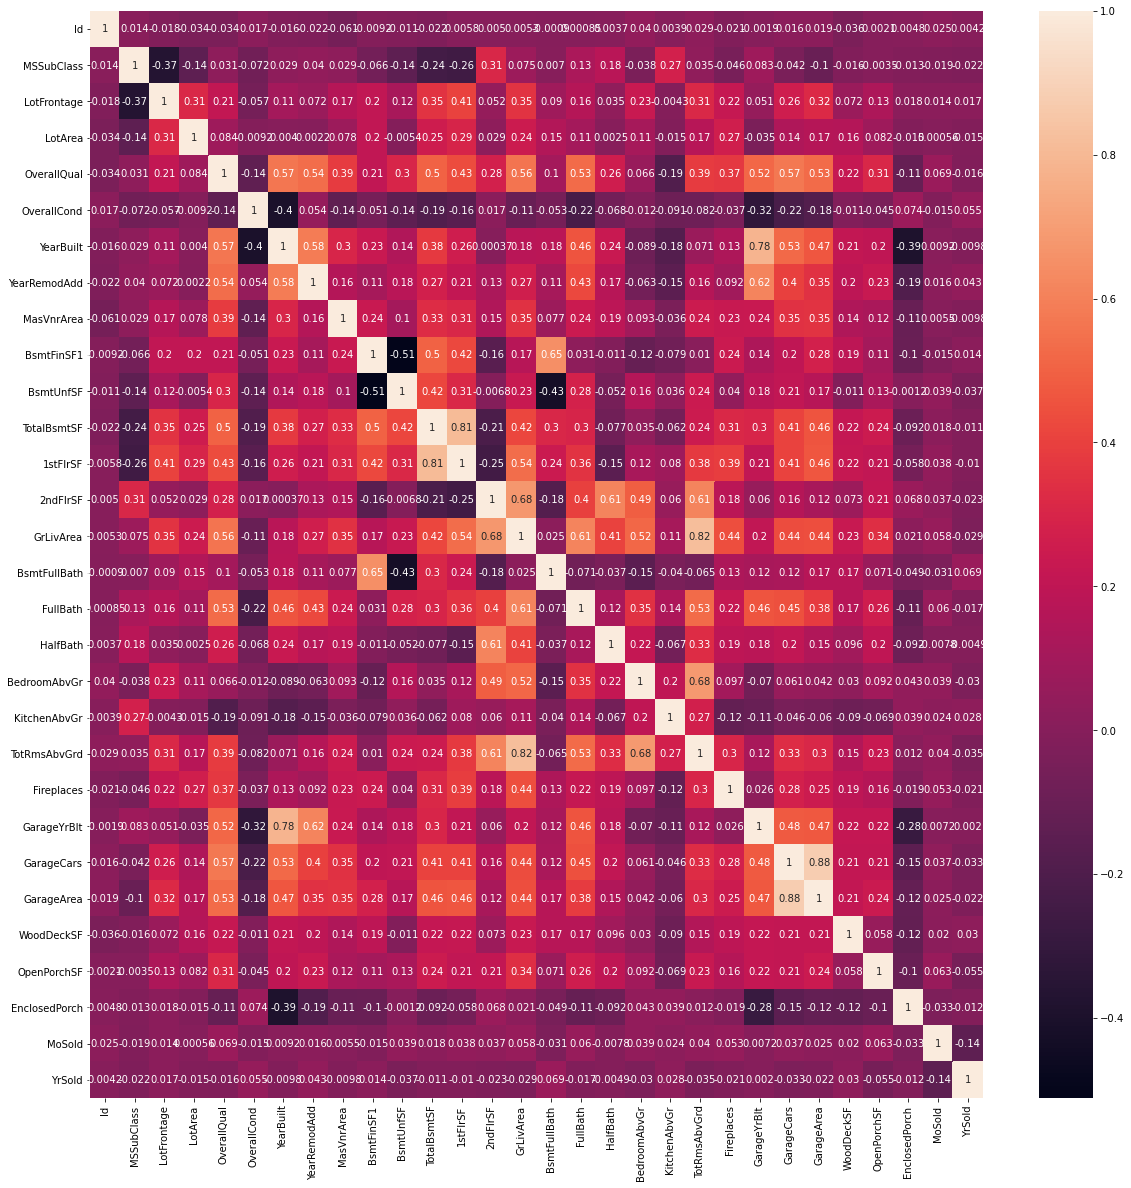

In [44]:
plt.figure(figsize=(20, 20))
sns.heatmap(TRAIN.drop(['SalePrice'], axis=1).corr(), annot=True)
plt.show()

In [45]:
cor = TRAIN.drop(['SalePrice'], axis=1).corr()
for i, col in enumerate(cor.columns):
    for row in cor.index[i+1:]:
        if col != row and cor[col][row] > 0.7:
            print(f'({row}, {col}): {cor[col][row]}')

(GarageYrBlt, YearBuilt): 0.7831680894171819
(1stFlrSF, TotalBsmtSF): 0.8062325571480043
(TotRmsAbvGrd, GrLivArea): 0.8203863245198244
(GarageArea, GarageCars): 0.8763250298540036


From the plots above, we can see that few varibles are highly correlated, and it makes sense for them to be correlated. Hence, for now we might want to keep them.

## Scale variables: Feature scaling on the numeric values

In [46]:
sc = StandardScaler()
TRAIN[cont_cols_TRAIN[1:-1]] = sc.fit_transform(TRAIN[cont_cols_TRAIN[1:-1]])
TEST[cont_cols_TEST[1:]] = sc.transform(TEST[cont_cols_TEST[1:]])

### One-hot encoding of categorical columns

In [47]:
cat_cols_TRAIN = []
cont_cols_TRAIN = []

for i in TRAIN.columns:
    if TRAIN[i].dtypes == 'object':
        cat_cols_TRAIN.append(i)
    else:
        cont_cols_TRAIN.append(i)

In [48]:
cat_cols_TEST = []
cont_cols_TEST = []

for i in TEST.columns:
    if TEST[i].dtypes == 'object':
        cat_cols_TEST.append(i)
    else:
        cont_cols_TEST.append(i)

In [49]:
TRAIN = pd.get_dummies(TRAIN, drop_first=True, columns=cat_cols_TRAIN)
TEST = pd.get_dummies(TEST, drop_first=True, columns=cat_cols_TEST)

In [50]:
TRAIN.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_N.A,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N.A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_N.A,MiscFeature_N.A,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60,-0.224025,-0.202226,0.683624,-0.540435,1.052518,0.878173,0.555832,0.592889,-0.944784,-0.464932,-0.807779,1.187539,0.403810,1.105402,0.808791,1.229092,0.155862,-0.211823,0.947451

In [51]:
TEST.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_N.A,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N.A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_N.A,MiscFeature_N.A,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20,0.465283,0.116121,-0.835305,0.370039,-0.349441,-1.173206,-0.581432,0.060838,-0.671817,-0.403635,-0.701081,-0.801734,-1.228055,-0.82031,-1.041351,-0.759676,-1.084103,-0.211823,-0.953646,-0.953633,-0.729395,-1.053603,1.229322,0.364729,-0.710772,-0.359148,6,2010,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

**Check train and test for compatability: if both train and test data have thesame columns**

In [52]:
TRAIN.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=242)

In [53]:
TEST.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=224)

Now here we can see that there are a lot of variables in the train which are not there in the test and vice versa could also be possible.

In [54]:
TRAIN_col_list = TRAIN.columns.sort_values()
TEST_col_list = TEST.columns.sort_values()

In [55]:
## making the list of columns which are present in both the test and the train dataset
compatible_list = set(TRAIN_col_list).intersection(TEST_col_list)

In [56]:
TRAIN_2 = TRAIN[compatible_list]

In [57]:
TRAIN_2.head()

,ExterCond_Gd,Condition1_RRNn,HouseStyle_2.5Unf,Neighborhood_Gilbert,Functional_Min2,Alley_N.A,HouseStyle_2Story,GarageCond_Po,Condition1_Feedr,BldgType_Duplex,Condition1_RRAn,Neighborhood_CollgCr,MasVnrArea,RoofStyle_Hip,YearBuilt,PavedDrive_Y,LandSlope_Mod,BsmtFinType2_Rec,EnclosedPorch,Exterior1st_MetalSd,SaleType_ConLI,Exterior1st_CemntBd,FireplaceQu_TA,MSZoning_RL,PavedDrive_P,GarageYrBlt,FireplaceQu_Po,Neighborhood_SWISU,KitchenQual_TA,Foundation_Slab,Foundation_Wood,TotalBsmtSF,BsmtFinType1_BLQ,KitchenQual_Gd,GarageCond_TA,Exterior2nd_BrkFace,HeatingQC_Fa,SaleType_Con,Exterior2nd_ImStucc,MasVnrType_None,Electrical_SBrkr,SaleType_Oth,ExterQual_Gd,SaleType_ConLw,BsmtQual_Gd,Condition2_Norm,Exterior2nd_Stone,Id,MiscFeature_Shed,Exterior2nd_Stucco,LotConfig_FR3,Exterior1st_AsphShn,MSZoning_FV,Neighborhood_NridgHt,OpenPorchSF,BsmtCond_Po,RoofMatl_Tar&Grv,LotConfig_Inside,RoofStyle_Gambrel,Electrical_FuseP,WoodDeckSF,Fence_MnWw,Condition1_Norm,Exterior1st_CBlock,GarageCond_Fa,LandContour_Lvl,SaleType_WD,MoSold,BsmtFinType1_Unf,BsmtFinType2_LwQ,Fence_N.A,HouseStyle_SFoyer,BsmtFinSF1,FireplaceQu_Fa,Exterior1st_Stucco,BsmtExposure_Mn,GarageType_BuiltIn,Neighborhood_Somerst,BsmtFullBath,Fireplaces,Street_Pave,BsmtQual_TA,Neighborhood_Mitchel,Exterior1st_BrkComm,GarageType_Detchd,Functional_Mod,Functional_Sev,MSSubClass,BsmtUnfSF,LotFrontage,HalfBath,BsmtFinType1_LwQ,RoofStyle_Gable,SaleCondition_Partial,Heating_GasW,MSZoning_RM,GarageCond_Gd,Neighborhood_OldTown,Condition1_RRAe,LandContour_Low,Exterior1st_BrkFace,Exterior2nd_VinylSd,Neighborhood_Timber,GarageType_Basment,Exterior1st_WdShing,GarageType_Attchd,OverallQual,1stFlrSF,HeatingQC_TA,Functional_Maj2,MasVnrType_BrkFace,Neighborhood_BrkSide,OverallCond,Exterior2nd_HdBoard,Exterior2nd_Brk Cmn,Exterior2nd_Wd Sdng,Condition1_RRNe,Functional_Typ,RoofStyle_Shed,Neighborhood_NAmes,Exterior1st_Wd Sdng,GarageType_CarPort,Neighborhood_SawyerW,GarageFinish_RFn,GrLivArea,LotConfig_FR2,GarageFinish_Unf,BsmtExposure_Gd,YrSold,Neighborhood_Blueste,LotShape_Reg,Exterior2nd_Plywood,HouseStyle_SLvl,RoofMatl_WdShngl,GarageArea,BldgType_Twnhs,CentralAir_Y,Exterior1st_VinylSd,Neighborhood_NPkVill,SaleCondition_AdjLand,Neighborhood_Veenker,RoofStyle_Mansard,Functional_Min1,HouseStyle_1.5Unf,LotArea,Neighborhood_Crawfor,Neighborhood_NoRidge,Heating_Grav,FireplaceQu_N.A,Neighborhood_MeadowV,HeatingQC_Po,Neighborhood_Edwards,BedroomAbvGr,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_No,BsmtFinType2_Unf,Condition1_PosA,Exterior2nd_MetalSd,BsmtFinType2_BLQ,MasVnrType_Stone,HouseStyle_1Story,Alley_Pave,BsmtFinType2_GLQ,GarageCars,Condition2_PosN,ExterCond_Po,BsmtFinType1_Rec,MSZoning_RH,Neighborhood_ClearCr,Exterior1st_HdBoard,FireplaceQu_Gd,Foundation_PConc,Fence_MnPrv,SaleType_ConLD,Heating_Wall,LotShape_IR3,MiscFeature_Othr,2ndFlrSF,Electrical_FuseF,BsmtQual_Fa,KitchenQual_Fa,HeatingQC_Gd,LotShape_IR2,BldgType_TwnhsE,Neighborhood_IDOTRR,Neighborhood_NWAmes,SaleType_New,Neighborhood_Sawyer,SaleType_CWD,ExterCond_TA,GarageQual_Po,Condition2_Feedr,LandContour_HLS,Foundation_CBlock,MiscFeature_N.A,RoofMatl_WdShake,GarageQual_Gd,Neighborhood_BrDale,SaleCondition_Alloca,YearRemodAdd,Exterior2nd_CBlock,SaleCondition_Family,Exterior2nd_AsphShn,SaleCondition_Normal,Exterior1st_Plywood,KitchenAbvGr,LotConfig_CulDSac,TotRmsAbvGrd,ExterQual_Fa,Fence_GdWo,Neighborhood_StoneBr,Foundation_Stone,ExterCond_Fa,ExterQual_TA,BsmtFinType1_GLQ,FullBath,LandSlope_Sev,Exterior2nd_Wd Shng,Condition2_PosA,GarageQual_TA,Exterior2nd_CmentBd,BldgType_2fmCon,Condition1_PosN
0,0,0,0,0,0,1,1,0,0,0,0,1,0.555832,0,1.052518,1,0,0,-0.359148,0,0,0,0,1,0,1.022622,0,0,0,0,0,-0.464932,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,1.0,0,0,0,0,0,0,0.228480,0,0,1,0,0,-0.756069,0,1,0,0,1,1,2,0,0,1,0,0.592889,0,0,0,0,0,1.105402,-0.953633,1,0,0,0,0,0,0,60,-0.944784,-0.224025,1.229092,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.683624,-0.807779,0,0,1,0,-0.540435,0,0,0,0,1,0,0,0,0,0,1,0.403810,0,0,0,2008,0,1,0,0,0,0.357909,0,1,1,0,0,0,0,0,0,-0.202226,0,0,0,1,0,0,0,0.155862,0,1,1,1

In [58]:
TRAIN_2.shape

(1432, 224)

In [59]:
TEST_2 = TEST[compatible_list]

In [60]:
TEST_2.head()

,ExterCond_Gd,Condition1_RRNn,HouseStyle_2.5Unf,Neighborhood_Gilbert,Functional_Min2,Alley_N.A,HouseStyle_2Story,GarageCond_Po,Condition1_Feedr,BldgType_Duplex,Condition1_RRAn,Neighborhood_CollgCr,MasVnrArea,RoofStyle_Hip,YearBuilt,PavedDrive_Y,LandSlope_Mod,BsmtFinType2_Rec,EnclosedPorch,Exterior1st_MetalSd,SaleType_ConLI,Exterior1st_CemntBd,FireplaceQu_TA,MSZoning_RL,PavedDrive_P,GarageYrBlt,FireplaceQu_Po,Neighborhood_SWISU,KitchenQual_TA,Foundation_Slab,Foundation_Wood,TotalBsmtSF,BsmtFinType1_BLQ,KitchenQual_Gd,GarageCond_TA,Exterior2nd_BrkFace,HeatingQC_Fa,SaleType_Con,Exterior2nd_ImStucc,MasVnrType_None,Electrical_SBrkr,SaleType_Oth,ExterQual_Gd,SaleType_ConLw,BsmtQual_Gd,Condition2_Norm,Exterior2nd_Stone,Id,MiscFeature_Shed,Exterior2nd_Stucco,LotConfig_FR3,Exterior1st_AsphShn,MSZoning_FV,Neighborhood_NridgHt,OpenPorchSF,BsmtCond_Po,RoofMatl_Tar&Grv,LotConfig_Inside,RoofStyle_Gambrel,Electrical_FuseP,WoodDeckSF,Fence_MnWw,Condition1_Norm,Exterior1st_CBlock,GarageCond_Fa,LandContour_Lvl,SaleType_WD,MoSold,BsmtFinType1_Unf,BsmtFinType2_LwQ,Fence_N.A,HouseStyle_SFoyer,BsmtFinSF1,FireplaceQu_Fa,Exterior1st_Stucco,BsmtExposure_Mn,GarageType_BuiltIn,Neighborhood_Somerst,BsmtFullBath,Fireplaces,Street_Pave,BsmtQual_TA,Neighborhood_Mitchel,Exterior1st_BrkComm,GarageType_Detchd,Functional_Mod,Functional_Sev,MSSubClass,BsmtUnfSF,LotFrontage,HalfBath,BsmtFinType1_LwQ,RoofStyle_Gable,SaleCondition_Partial,Heating_GasW,MSZoning_RM,GarageCond_Gd,Neighborhood_OldTown,Condition1_RRAe,LandContour_Low,Exterior1st_BrkFace,Exterior2nd_VinylSd,Neighborhood_Timber,GarageType_Basment,Exterior1st_WdShing,GarageType_Attchd,OverallQual,1stFlrSF,HeatingQC_TA,Functional_Maj2,MasVnrType_BrkFace,Neighborhood_BrkSide,OverallCond,Exterior2nd_HdBoard,Exterior2nd_Brk Cmn,Exterior2nd_Wd Sdng,Condition1_RRNe,Functional_Typ,RoofStyle_Shed,Neighborhood_NAmes,Exterior1st_Wd Sdng,GarageType_CarPort,Neighborhood_SawyerW,GarageFinish_RFn,GrLivArea,LotConfig_FR2,GarageFinish_Unf,BsmtExposure_Gd,YrSold,Neighborhood_Blueste,LotShape_Reg,Exterior2nd_Plywood,HouseStyle_SLvl,RoofMatl_WdShngl,GarageArea,BldgType_Twnhs,CentralAir_Y,Exterior1st_VinylSd,Neighborhood_NPkVill,SaleCondition_AdjLand,Neighborhood_Veenker,RoofStyle_Mansard,Functional_Min1,HouseStyle_1.5Unf,LotArea,Neighborhood_Crawfor,Neighborhood_NoRidge,Heating_Grav,FireplaceQu_N.A,Neighborhood_MeadowV,HeatingQC_Po,Neighborhood_Edwards,BedroomAbvGr,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_No,BsmtFinType2_Unf,Condition1_PosA,Exterior2nd_MetalSd,BsmtFinType2_BLQ,MasVnrType_Stone,HouseStyle_1Story,Alley_Pave,BsmtFinType2_GLQ,GarageCars,Condition2_PosN,ExterCond_Po,BsmtFinType1_Rec,MSZoning_RH,Neighborhood_ClearCr,Exterior1st_HdBoard,FireplaceQu_Gd,Foundation_PConc,Fence_MnPrv,SaleType_ConLD,Heating_Wall,LotShape_IR3,MiscFeature_Othr,2ndFlrSF,Electrical_FuseF,BsmtQual_Fa,KitchenQual_Fa,HeatingQC_Gd,LotShape_IR2,BldgType_TwnhsE,Neighborhood_IDOTRR,Neighborhood_NWAmes,SaleType_New,Neighborhood_Sawyer,SaleType_CWD,ExterCond_TA,GarageQual_Po,Condition2_Feedr,LandContour_HLS,Foundation_CBlock,MiscFeature_N.A,RoofMatl_WdShake,GarageQual_Gd,Neighborhood_BrDale,SaleCondition_Alloca,YearRemodAdd,Exterior2nd_CBlock,SaleCondition_Family,Exterior2nd_AsphShn,SaleCondition_Normal,Exterior1st_Plywood,KitchenAbvGr,LotConfig_CulDSac,TotRmsAbvGrd,ExterQual_Fa,Fence_GdWo,Neighborhood_StoneBr,Foundation_Stone,ExterCond_Fa,ExterQual_TA,BsmtFinType1_GLQ,FullBath,LandSlope_Sev,Exterior2nd_Wd Shng,Condition2_PosA,GarageQual_TA,Exterior2nd_CmentBd,BldgType_2fmCon,Condition1_PosN
0,0,0,0,0,0,1,0,0,1,0,0,0,-0.581432,0,-0.349441,1,0,0,-0.359148,0,0,0,0,0,0,-0.729395,0,0,1,0,0,-0.403635,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1461.0,0,0,0,0,0,0,-0.710772,0,0,1,0,0,0.364729,0,0,0,0,1,1,6,0,1,0,0,0.060838,0,0,0,0,0,-0.82031,-0.953633,1,1,0,0,0,0,0,20,-0.671817,0.465283,-0.759676,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,-0.835305,-0.701081,1,0,0,0,0.370039,0,0,0,0,1,0,1,0,0,0,0,-1.228055,0,1,0,2010,0,1,0,0,0,1.229322,0,1,1,0,0,0,0,0,0,0.116121,0,0,0,1,0,0,0,-1.084103,

In [61]:
TEST_2.shape

(1459, 224)

Now the test and train dataframes are perfectly compatible. We will now create a feature set and the outcome variable on the train dataset

## Creating A feature set (X) and Outcome Variable (Y)


In [62]:
import statsmodels.api as sm

In [63]:
# copying all predictor variables into X and Target variable in Y
X = TRAIN_2
Y = TRAIN['SalePrice']

In [64]:
X.head()

,ExterCond_Gd,Condition1_RRNn,HouseStyle_2.5Unf,Neighborhood_Gilbert,Functional_Min2,Alley_N.A,HouseStyle_2Story,GarageCond_Po,Condition1_Feedr,BldgType_Duplex,Condition1_RRAn,Neighborhood_CollgCr,MasVnrArea,RoofStyle_Hip,YearBuilt,PavedDrive_Y,LandSlope_Mod,BsmtFinType2_Rec,EnclosedPorch,Exterior1st_MetalSd,SaleType_ConLI,Exterior1st_CemntBd,FireplaceQu_TA,MSZoning_RL,PavedDrive_P,GarageYrBlt,FireplaceQu_Po,Neighborhood_SWISU,KitchenQual_TA,Foundation_Slab,Foundation_Wood,TotalBsmtSF,BsmtFinType1_BLQ,KitchenQual_Gd,GarageCond_TA,Exterior2nd_BrkFace,HeatingQC_Fa,SaleType_Con,Exterior2nd_ImStucc,MasVnrType_None,Electrical_SBrkr,SaleType_Oth,ExterQual_Gd,SaleType_ConLw,BsmtQual_Gd,Condition2_Norm,Exterior2nd_Stone,Id,MiscFeature_Shed,Exterior2nd_Stucco,LotConfig_FR3,Exterior1st_AsphShn,MSZoning_FV,Neighborhood_NridgHt,OpenPorchSF,BsmtCond_Po,RoofMatl_Tar&Grv,LotConfig_Inside,RoofStyle_Gambrel,Electrical_FuseP,WoodDeckSF,Fence_MnWw,Condition1_Norm,Exterior1st_CBlock,GarageCond_Fa,LandContour_Lvl,SaleType_WD,MoSold,BsmtFinType1_Unf,BsmtFinType2_LwQ,Fence_N.A,HouseStyle_SFoyer,BsmtFinSF1,FireplaceQu_Fa,Exterior1st_Stucco,BsmtExposure_Mn,GarageType_BuiltIn,Neighborhood_Somerst,BsmtFullBath,Fireplaces,Street_Pave,BsmtQual_TA,Neighborhood_Mitchel,Exterior1st_BrkComm,GarageType_Detchd,Functional_Mod,Functional_Sev,MSSubClass,BsmtUnfSF,LotFrontage,HalfBath,BsmtFinType1_LwQ,RoofStyle_Gable,SaleCondition_Partial,Heating_GasW,MSZoning_RM,GarageCond_Gd,Neighborhood_OldTown,Condition1_RRAe,LandContour_Low,Exterior1st_BrkFace,Exterior2nd_VinylSd,Neighborhood_Timber,GarageType_Basment,Exterior1st_WdShing,GarageType_Attchd,OverallQual,1stFlrSF,HeatingQC_TA,Functional_Maj2,MasVnrType_BrkFace,Neighborhood_BrkSide,OverallCond,Exterior2nd_HdBoard,Exterior2nd_Brk Cmn,Exterior2nd_Wd Sdng,Condition1_RRNe,Functional_Typ,RoofStyle_Shed,Neighborhood_NAmes,Exterior1st_Wd Sdng,GarageType_CarPort,Neighborhood_SawyerW,GarageFinish_RFn,GrLivArea,LotConfig_FR2,GarageFinish_Unf,BsmtExposure_Gd,YrSold,Neighborhood_Blueste,LotShape_Reg,Exterior2nd_Plywood,HouseStyle_SLvl,RoofMatl_WdShngl,GarageArea,BldgType_Twnhs,CentralAir_Y,Exterior1st_VinylSd,Neighborhood_NPkVill,SaleCondition_AdjLand,Neighborhood_Veenker,RoofStyle_Mansard,Functional_Min1,HouseStyle_1.5Unf,LotArea,Neighborhood_Crawfor,Neighborhood_NoRidge,Heating_Grav,FireplaceQu_N.A,Neighborhood_MeadowV,HeatingQC_Po,Neighborhood_Edwards,BedroomAbvGr,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_No,BsmtFinType2_Unf,Condition1_PosA,Exterior2nd_MetalSd,BsmtFinType2_BLQ,MasVnrType_Stone,HouseStyle_1Story,Alley_Pave,BsmtFinType2_GLQ,GarageCars,Condition2_PosN,ExterCond_Po,BsmtFinType1_Rec,MSZoning_RH,Neighborhood_ClearCr,Exterior1st_HdBoard,FireplaceQu_Gd,Foundation_PConc,Fence_MnPrv,SaleType_ConLD,Heating_Wall,LotShape_IR3,MiscFeature_Othr,2ndFlrSF,Electrical_FuseF,BsmtQual_Fa,KitchenQual_Fa,HeatingQC_Gd,LotShape_IR2,BldgType_TwnhsE,Neighborhood_IDOTRR,Neighborhood_NWAmes,SaleType_New,Neighborhood_Sawyer,SaleType_CWD,ExterCond_TA,GarageQual_Po,Condition2_Feedr,LandContour_HLS,Foundation_CBlock,MiscFeature_N.A,RoofMatl_WdShake,GarageQual_Gd,Neighborhood_BrDale,SaleCondition_Alloca,YearRemodAdd,Exterior2nd_CBlock,SaleCondition_Family,Exterior2nd_AsphShn,SaleCondition_Normal,Exterior1st_Plywood,KitchenAbvGr,LotConfig_CulDSac,TotRmsAbvGrd,ExterQual_Fa,Fence_GdWo,Neighborhood_StoneBr,Foundation_Stone,ExterCond_Fa,ExterQual_TA,BsmtFinType1_GLQ,FullBath,LandSlope_Sev,Exterior2nd_Wd Shng,Condition2_PosA,GarageQual_TA,Exterior2nd_CmentBd,BldgType_2fmCon,Condition1_PosN
0,0,0,0,0,0,1,1,0,0,0,0,1,0.555832,0,1.052518,1,0,0,-0.359148,0,0,0,0,1,0,1.022622,0,0,0,0,0,-0.464932,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,1.0,0,0,0,0,0,0,0.228480,0,0,1,0,0,-0.756069,0,1,0,0,1,1,2,0,0,1,0,0.592889,0,0,0,0,0,1.105402,-0.953633,1,0,0,0,0,0,0,60,-0.944784,-0.224025,1.229092,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.683624,-0.807779,0,0,1,0,-0.540435,0,0,0,0,1,0,0,0,0,0,1,0.403810,0,0,0,2008,0,1,0,0,0,0.357909,0,1,1,0,0,0,0,0,0,-0.202226,0,0,0,1,0,0,0,0.155862,0,1,1,1

In [65]:
Y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## Splitting the TRAIN dataset into the training set and test set

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

# Modelling

Training the Multiple Linear Regression model on the Training set

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Predicting the Test set results

In [68]:
# NB: our model expects inputs as numpy arrays. Also, the prediction y_pred is a numpy array. 
# To display y-pred against y_test (which is still a dataframe), we need to reshape it by accessing the values, 
# thus add .values to the reshape method.

y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)  #to keep decimal places to 2
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))



[[12.02 12.11]
 [11.64 11.74]
 [12.44 12.43]
 [11.8  11.85]
 [11.78 11.84]
 [11.93 11.85]
 [12.13 12.21]
 [11.75 11.59]
 [11.72 11.77]
 [11.63 11.59]
 [12.49 12.34]
 [12.11 12.01]
 [11.82 11.85]
 [11.87 11.73]
 [12.67 12.83]
 [11.87 11.9 ]
 [12.24 12.21]
 [11.67 11.61]
 [12.   11.84]
 [11.69 11.61]
 [11.38 11.29]
 [11.81 11.72]
 [12.04 12.03]
 [11.48 11.35]
 [11.73 11.75]
 [12.06 11.97]
 [11.65 11.81]
 [12.01 12.08]
 [12.34 12.49]
 [11.89 11.96]
 [11.95 11.93]
 [12.34 12.27]
 [11.43 11.28]
 [11.39 11.49]
 [11.77 11.74]
 [12.28 12.14]
 [12.55 12.68]
 [11.97 12.05]
 [12.61 12.55]
 [11.76 11.77]
 [11.92 11.9 ]
 [12.07 12.13]
 [11.73 11.69]
 [12.41 12.33]
 [12.01 11.85]
 [11.35 11.38]
 [11.25 11.13]
 [12.38 12.39]
 [12.51 12.57]
 [11.45 11.3 ]
 [12.28 12.2 ]
 [12.13 12.08]
 [11.92 11.96]
 [12.29 12.39]
 [12.01 12.1 ]
 [12.41 12.38]
 [12.26 12.24]
 [12.28 12.28]
 [12.38 12.51]
 [12.01 12.02]
 [12.41 12.45]
 [12.33 12.36]
 [11.73 11.74]
 [12.08 12.07]
 [11.23 11.25]
 [11.99 11.9 ]
 [11.79 11

Evaluating the multiple regression Model Performance

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8909554833518608

Training the Polynomial Regression model on the Training set

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
# x_poly = poly_reg.fit_transform(x_train)
# regressor2 = LinearRegression()
# regressor2.fit(x_poly, y_train)


In [71]:
x_poly = poly_reg.fit_transform(x_train)

In [72]:
regressor2 = LinearRegression()
regressor2.fit(x_poly, y_train)

LinearRegression()

In [73]:
y_pred2 = regressor2.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.values.reshape(len(y_test),1)),1))

[[11.88 12.11]
 [11.72 11.74]
 [12.48 12.43]
 [12.01 11.85]
 [11.73 11.84]
 [11.89 11.85]
 [11.51 12.21]
 [11.75 11.59]
 [11.81 11.77]
 [11.66 11.59]
 [15.01 12.34]
 [12.08 12.01]
 [11.9  11.85]
 [11.81 11.73]
 [12.76 12.83]
 [12.04 11.9 ]
 [12.75 12.21]
 [11.95 11.61]
 [12.18 11.84]
 [11.75 11.61]
 [10.95 11.29]
 [12.02 11.72]
 [13.11 12.03]
 [11.4  11.35]
 [11.69 11.75]
 [12.25 11.97]
 [11.92 11.81]
 [12.11 12.08]
 [12.28 12.49]
 [12.18 11.96]
 [11.74 11.93]
 [12.18 12.27]
 [11.03 11.28]
 [11.58 11.49]
 [10.32 11.74]
 [12.19 12.14]
 [12.35 12.68]
 [12.   12.05]
 [12.24 12.55]
 [11.79 11.77]
 [11.95 11.9 ]
 [12.31 12.13]
 [11.74 11.69]
 [12.55 12.33]
 [11.87 11.85]
 [11.43 11.38]
 [10.79 11.13]
 [12.52 12.39]
 [13.09 12.57]
 [11.15 11.3 ]
 [12.34 12.2 ]
 [12.21 12.08]
 [11.82 11.96]
 [12.45 12.39]
 [12.06 12.1 ]
 [12.29 12.38]
 [12.54 12.24]
 [12.22 12.28]
 [12.73 12.51]
 [12.03 12.02]
 [12.42 12.45]
 [12.5  12.36]
 [11.63 11.74]
 [11.96 12.07]
 [10.68 11.25]
 [11.93 11.9 ]
 [11.82 11

In [74]:
# Evaluating the polynomial regression Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.04481848402372912

Training the Decision Tree Regression model on the Training set

In [75]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 0)
regressor3.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [76]:
#predicting the test set results with decision tree model

y_pred3 = regressor3.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.values.reshape(len(y_test),1)),1))

[[11.88 12.11]
 [11.76 11.74]
 [12.6  12.43]
 [12.01 11.85]
 [11.97 11.84]
 [11.95 11.85]
 [11.87 12.21]
 [11.79 11.59]
 [11.39 11.77]
 [11.79 11.59]
 [12.02 12.34]
 [12.15 12.01]
 [11.79 11.85]
 [11.35 11.73]
 [12.53 12.83]
 [12.04 11.9 ]
 [12.14 12.21]
 [11.48 11.61]
 [12.06 11.84]
 [11.6  11.61]
 [11.28 11.29]
 [11.63 11.72]
 [12.03 12.03]
 [11.51 11.35]
 [11.54 11.75]
 [12.01 11.97]
 [11.74 11.81]
 [11.96 12.08]
 [12.35 12.49]
 [11.58 11.96]
 [11.94 11.93]
 [12.31 12.27]
 [11.56 11.28]
 [11.35 11.49]
 [11.75 11.74]
 [12.15 12.14]
 [12.53 12.68]
 [12.11 12.05]
 [12.21 12.55]
 [11.74 11.77]
 [11.82 11.9 ]
 [12.06 12.13]
 [11.7  11.69]
 [12.56 12.33]
 [11.78 11.85]
 [11.44 11.38]
 [11.19 11.13]
 [12.3  12.39]
 [12.88 12.57]
 [11.11 11.3 ]
 [12.45 12.2 ]
 [12.13 12.08]
 [11.78 11.96]
 [12.51 12.39]
 [12.12 12.1 ]
 [12.18 12.38]
 [12.13 12.24]
 [12.12 12.28]
 [12.69 12.51]
 [12.03 12.02]
 [12.38 12.45]
 [12.48 12.36]
 [11.7  11.74]
 [12.08 12.07]
 [11.63 11.25]
 [11.92 11.9 ]
 [11.74 11

In [77]:
# Evaluating the decision tree regression Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.6886102302567356

Training the Random Forest Regression model on the Training set

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor4.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [79]:
#predicting the test set results with the random forest model

y_pred4 = regressor4.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.values.reshape(len(y_test),1)),1))

[[11.96 12.11]
 [11.69 11.74]
 [12.44 12.43]
 [11.85 11.85]
 [11.89 11.84]
 [11.98 11.85]
 [11.94 12.21]
 [11.78 11.59]
 [11.69 11.77]
 [11.55 11.59]
 [12.2  12.34]
 [12.04 12.01]
 [11.84 11.85]
 [11.82 11.73]
 [12.53 12.83]
 [11.84 11.9 ]
 [12.16 12.21]
 [11.7  11.61]
 [12.03 11.84]
 [11.52 11.61]
 [11.49 11.29]
 [11.65 11.72]
 [12.08 12.03]
 [11.4  11.35]
 [11.68 11.75]
 [12.04 11.97]
 [11.76 11.81]
 [12.05 12.08]
 [12.27 12.49]
 [11.91 11.96]
 [11.83 11.93]
 [12.34 12.27]
 [11.48 11.28]
 [11.55 11.49]
 [11.79 11.74]
 [12.3  12.14]
 [12.39 12.68]
 [11.98 12.05]
 [12.56 12.55]
 [11.7  11.77]
 [11.82 11.9 ]
 [12.01 12.13]
 [11.7  11.69]
 [12.53 12.33]
 [11.96 11.85]
 [11.4  11.38]
 [11.34 11.13]
 [12.37 12.39]
 [12.66 12.57]
 [11.53 11.3 ]
 [12.25 12.2 ]
 [12.14 12.08]
 [11.93 11.96]
 [12.22 12.39]
 [12.02 12.1 ]
 [12.28 12.38]
 [12.32 12.24]
 [12.25 12.28]
 [12.3  12.51]
 [11.97 12.02]
 [12.48 12.45]
 [12.28 12.36]
 [11.71 11.74]
 [11.94 12.07]
 [11.53 11.25]
 [11.86 11.9 ]
 [11.77 11

In [80]:
# Evaluating the random forest regression Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

0.8521618805628302

Training the Support Vector Regression (SVR) model on the Training set

In [81]:
from sklearn.svm import SVR
regressor5 = SVR(kernel = 'rbf')
regressor5.fit(x_train, y_train)

SVR()

In [82]:
#predicting the test set results with the SVR model

y_pred5 = regressor5.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.values.reshape(len(y_test),1)),1))

[[12.03 12.11]
 [11.99 11.74]
 [12.02 12.43]
 [12.01 11.85]
 [12.   11.84]
 [12.01 11.85]
 [11.99 12.21]
 [11.98 11.59]
 [12.02 11.77]
 [12.01 11.59]
 [11.99 12.34]
 [11.99 12.01]
 [11.99 11.85]
 [11.98 11.73]
 [12.03 12.83]
 [12.   11.9 ]
 [12.02 12.21]
 [12.02 11.61]
 [12.02 11.84]
 [12.01 11.61]
 [12.02 11.29]
 [12.02 11.72]
 [11.97 12.03]
 [12.01 11.35]
 [12.02 11.75]
 [12.02 11.97]
 [12.02 11.81]
 [11.99 12.08]
 [12.   12.49]
 [12.   11.96]
 [12.02 11.93]
 [12.   12.27]
 [11.99 11.28]
 [12.   11.49]
 [11.97 11.74]
 [12.   12.14]
 [12.01 12.68]
 [12.02 12.05]
 [12.   12.55]
 [12.   11.77]
 [12.   11.9 ]
 [12.   12.13]
 [11.99 11.69]
 [12.   12.33]
 [11.99 11.85]
 [12.   11.38]
 [12.02 11.13]
 [12.01 12.39]
 [12.   12.57]
 [12.01 11.3 ]
 [12.01 12.2 ]
 [12.02 12.08]
 [11.99 11.96]
 [12.01 12.39]
 [11.98 12.1 ]
 [12.   12.38]
 [12.01 12.24]
 [11.99 12.28]
 [11.99 12.51]
 [12.01 12.02]
 [12.   12.45]
 [12.01 12.36]
 [12.   11.74]
 [11.99 12.07]
 [12.02 11.25]
 [11.99 11.9 ]
 [12.   11

In [83]:
# Evaluating the SVR Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred5)

0.018015022409466175

Since the multiple linear regression model produced the best r squared score (0.89), it is fair to say this is the best model to use for predicting the house prices

## Using the multiple linear regression model to predict the TEST set (TEST_2) results

In [84]:
Y_PRED = regressor.predict(TEST_2)

In [85]:
Y_PRED

array([11.67, 11.84, 12.08, ..., 11.93, 11.64, 12.29])

In [86]:
# To reverse the standard scalar from the predicted sales prices

Y_PRED = np.expm1(Y_PRED)

In [87]:

submission = pd.DataFrame({'Id': TEST['Id'], 'SalePrice' : Y_PRED})
print(submission)

          Id      SalePrice
0     1461.0  116953.670833
1     1462.0  138569.629674
2     1463.0  176190.320266
3     1464.0  198271.166926
4     1465.0  184997.997402
...      ...            ...
1454  2915.0   77422.475223
1455  2916.0   77751.730855
1456  2917.0  151781.749522
1457  2918.0  113307.847275
1458  2919.0  217074.106794

[1459 rows x 2 columns]


In [91]:
submission.to_csv('/Users/amari/Documents/Data Science Udemy/Kaggle Projects/House prices/submission.csv')